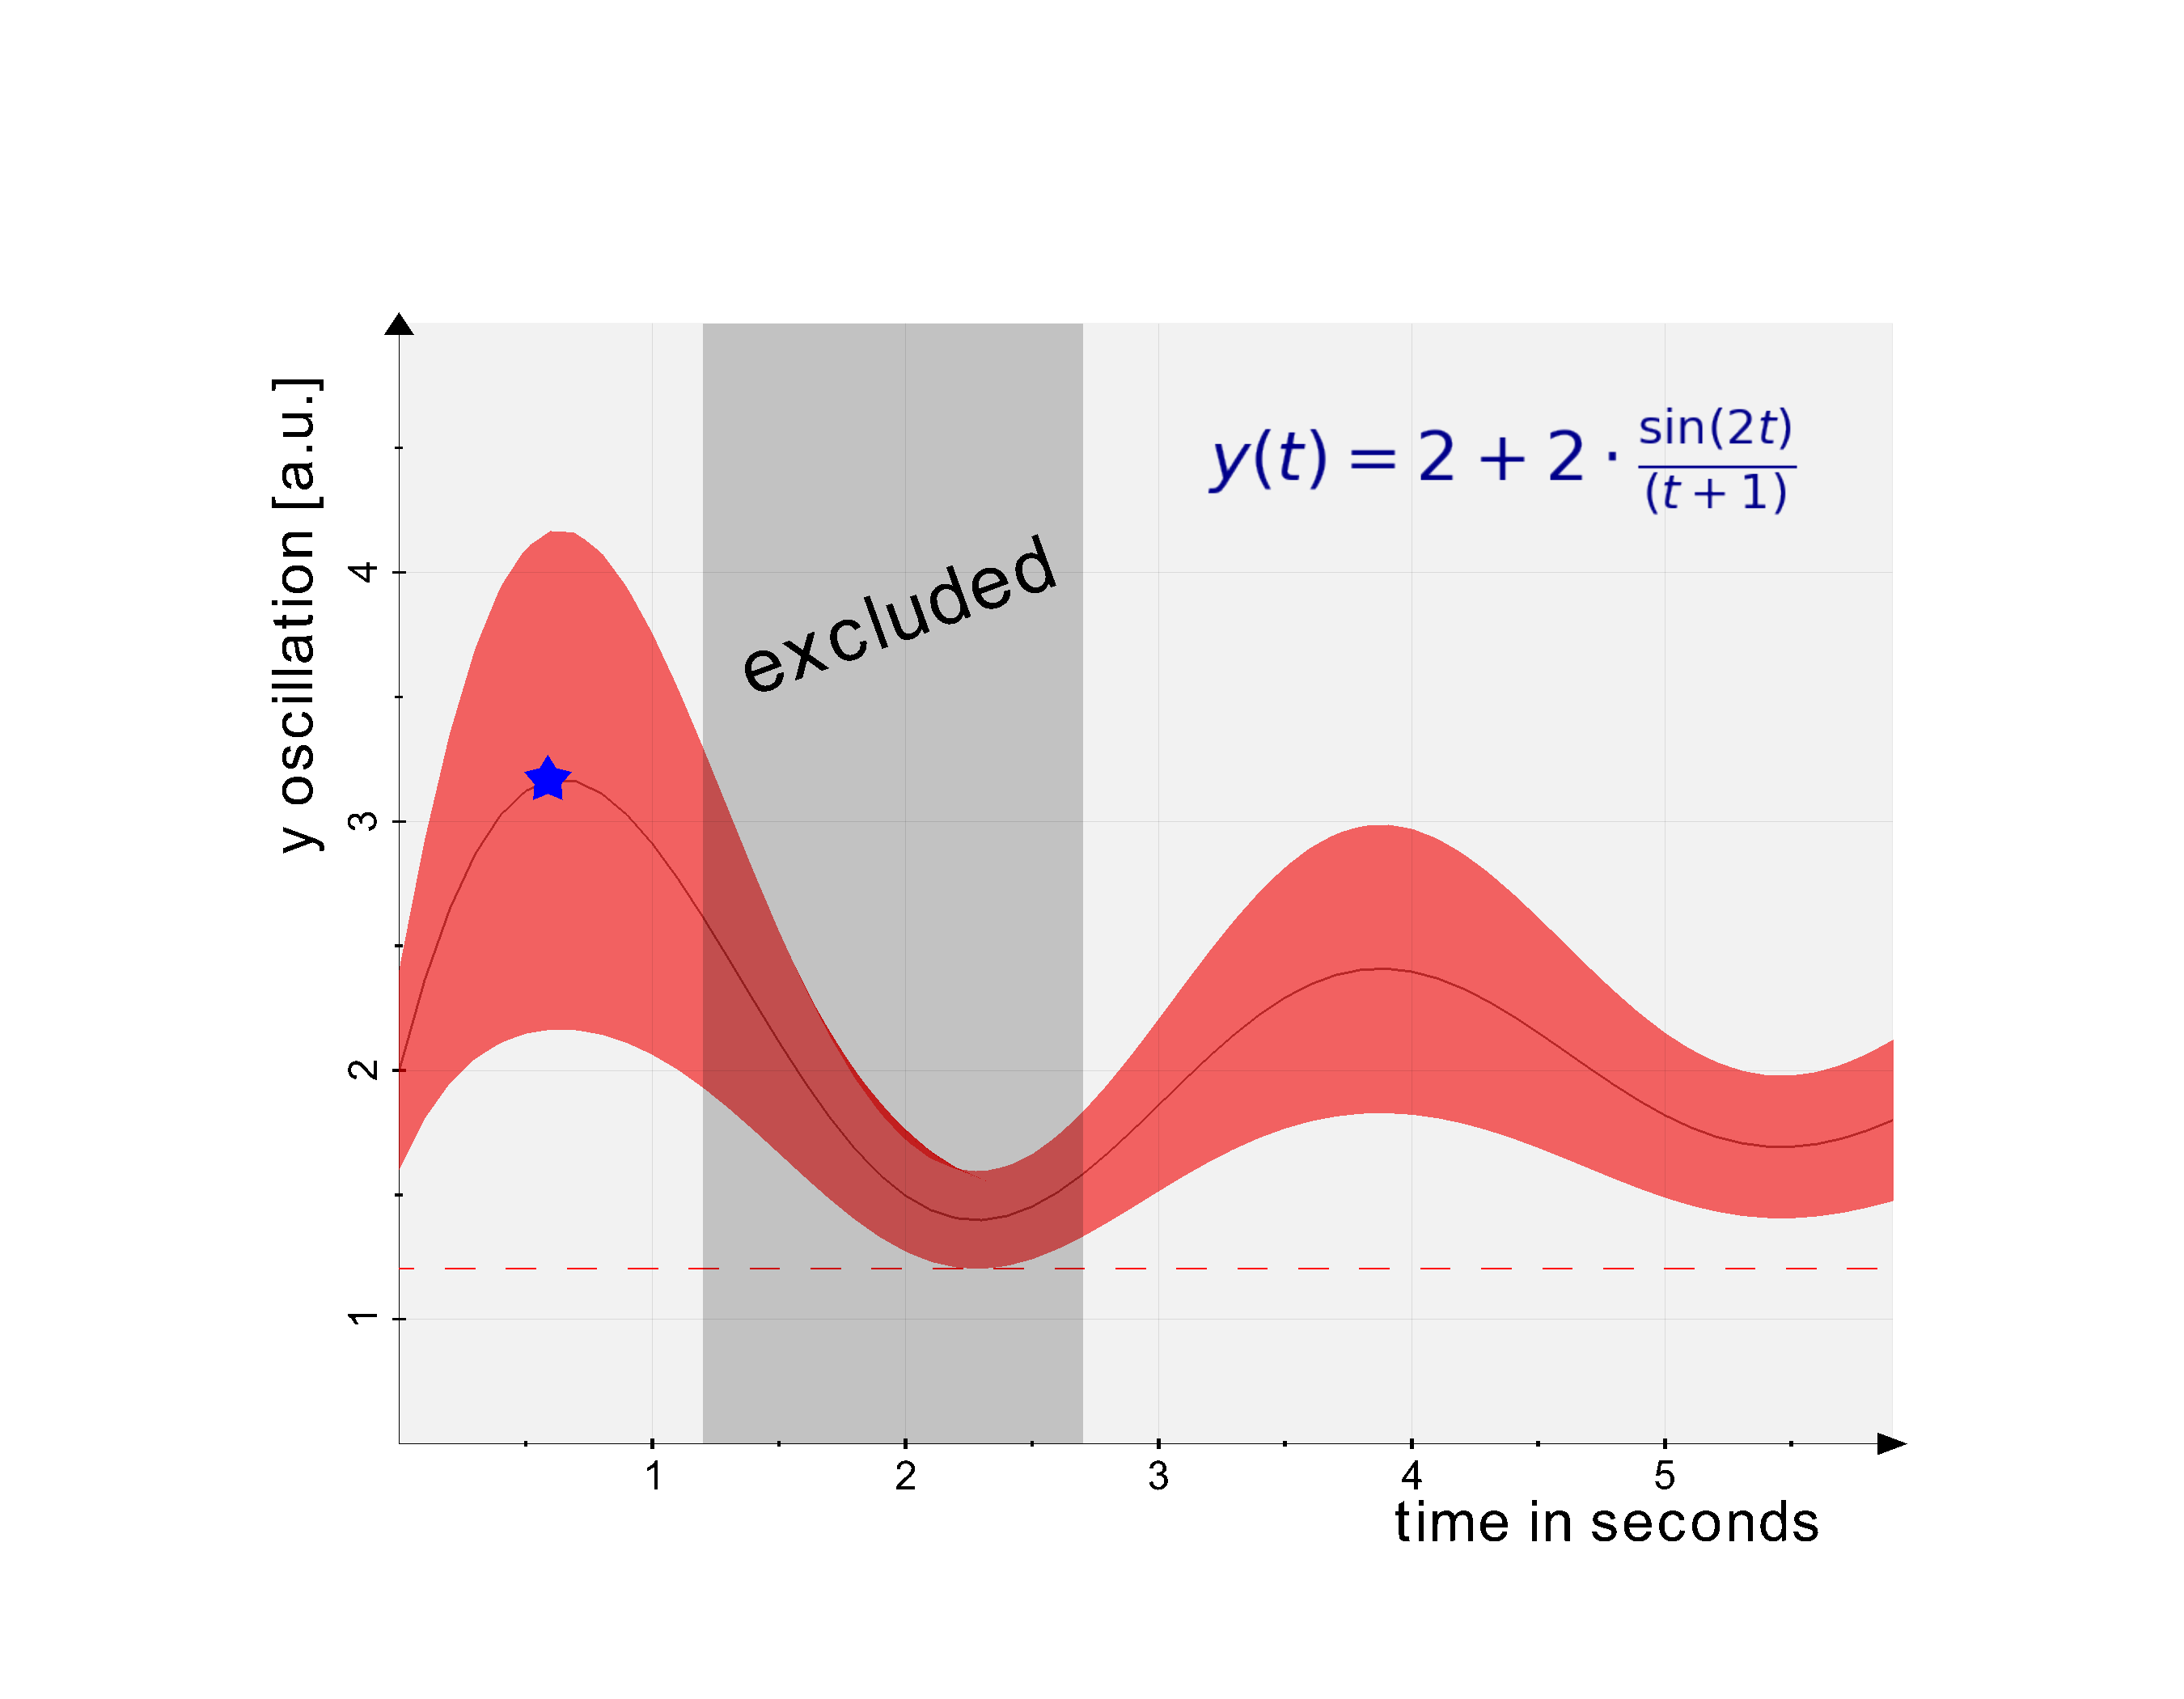

In [1]:
from vtkplotter import *
import numpy as np

embedWindow('2d')

# Make up same data
x = np.arange(0, 6, 0.1)
y = 2+2*np.sin(2*x)/(x+1)
ye= y**2 / 10
miny = np.min(y-ye)
idx = np.argmax(y)

# Plot the two variables, return a Plot(Assembly) object:
plt = plot(x,y,
           yerrors=ye,
           xtitle='time in seconds',
           ytitle='y oscillation [a.u.]',
           ylim=(0.5, 5),
           aspect=4/3,     # aspect ratio (any float = x_size/y_size)
           errorBand=True, # join errors on y into an error band
           lc="k",         # line color
           ec="r",         # error band color
           la=0.6,         # error and line alphas
           pad=0.0,        # tight margins, no padding
)

# Add a grey transparent rectangle as an exclusion region:
plt += Rectangle([1.2,0.5], [2.7,5], alpha=0.2, c='k')

# Add some text and latex formula
plt += Text("excluded", pos=(1.4, 3.5), s=0.2, c='k').rotateZ(20)
plt += Latex(r"y(t)=2+2\cdot\frac{\sin(2t)}{(t+1)}", pos=(4.7, 4.7), s=.8, c='db')

# Add a star marker at maximum of function (at z=0.1, so it stays on top):
plt += Marker('*', pos=(x[idx], y[idx], 0.1), c='blue')

# Add a dashed line for the minimum
plt += DashedLine([x[0], miny], [x[-1], miny])

plt.show(zoom=1.3)